# USD Price prediction

In [5]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [6]:
money = pd.read_csv('usd_exchange_rate.csv')
money

,nominal,data,curs,cdx
0,1,1/1/16,72.9299,Доллар США
1,1,1/12/16,75.9507,Доллар США
2,1,1/13/16,76.6041,Доллар США
3,1,1/14/16,76.4275,Доллар США
4,1,1/15/16,76.5230,Доллар США
...,...,...,...,...
941,1,10/25/19,63.8600,Доллар США
942,1,10/26/19,63.9966,Доллар США
943,1,10/29/19,63.8700,Доллар США
944,1,10/30/19,63.8320,Доллар США


In [7]:
values = money['curs']
values

0      72.9299
1      75.9507
2      76.6041
3      76.4275
4      76.5230
        ...   
941    63.8600
942    63.9966
943    63.8700
944    63.8320
945    63.8734
Name: curs, Length: 946, dtype: float64

In [8]:
past = 7 * 4
future = 7
start=past
end=len(values) - future

In [9]:
raw_df = []
for i in range(start, end):
    # past_and_future_values
    paf_values = values[(i-past):(i+future)]
    raw_df.append(list(paf_values))

In [10]:
past_cols = [f'past_{i}' for i in range(past)]
future_cols = [f'fut_{i}' for i in range(future)]

In [11]:
df = pd.DataFrame(raw_df, columns=(past_cols+future_cols))
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,fut_0,fut_1,fut_2,fut_3,fut_4,fut_5,fut_6
0,72.9299,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,...,79.4951,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903
1,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,...,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994
2,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,...,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536
3,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,...,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256
4,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,78.9969,...,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256,73.8242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,66.0528,65.9981,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,...,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997
907,65.9981,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,...,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600
908,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,...,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966
909,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,63.9453,...,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966,63.8700


In [12]:
# Trining
x = df[past_cols][:-1]
y = df[future_cols][:-1]

# Test
x_test = df[past_cols][-1:]
y_test = df[future_cols][-1:]

In [13]:
from sklearn.linear_model import LinearRegression

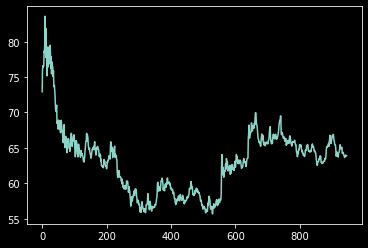

In [14]:
plt.plot(values)
plt.show()

In [15]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
prediction = LinReg.predict(x_test)

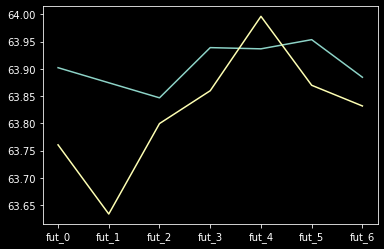

In [17]:
plt.plot(prediction[0])
plt.plot(y_test.iloc[0])
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
abs_err = mean_absolute_error(y_test, prediction)
sq_err = mean_squared_error(y_test, prediction)
print('Mean absolute error:', abs_err)
print('Mean squared error:', sq_err)

Mean absolute error: 0.10076218757688846
Mean squared error: 0.014290098695527196


## MLP Regressor

In [29]:
from sklearn.neural_network import MLPRegressor

C:\Users\4egod\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Mean absolute error: 0.5320827805499978
Mean squared error: 0.3964565988394749


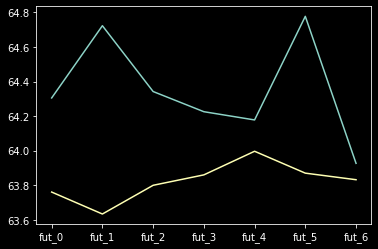

In [36]:
MLP = MLPRegressor(max_iter=400)
MLP.fit(x, y)
prediction = MLP.predict(x_test)
plt.plot(prediction[0])
plt.plot(y_test.iloc[0])
plt.show()
abs_err = mean_absolute_error(y_test, prediction)
sq_err = mean_squared_error(y_test, prediction)
print('Mean absolute error:', abs_err)
print('Mean squared error:', sq_err)

## Target 1
Should be better then:
mean_absolute_error 0.46686111211953524
mean_squared_error 0.26871741327188564

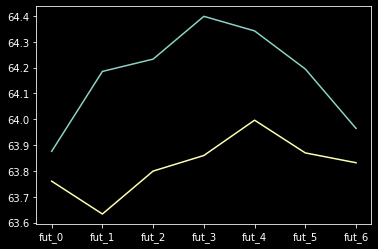

Mean absolute error: 0.34875659606367393
Mean squared error: 0.14818914004540604


In [35]:
MLP = MLPRegressor(hidden_layer_sizes=(10,), max_iter=100000, random_state=60)
MLP.fit(x, y)
prediction = MLP.predict(x_test)
plt.plot(prediction[0])
plt.plot(y_test.iloc[0])
plt.show()
abs_err = mean_absolute_error(y_test, prediction)
sq_err = mean_squared_error(y_test, prediction)
print('Mean absolute error:', abs_err)
print('Mean squared error:', sq_err)